### Baseball Case Study
### Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

#### R – Runs scored: number of times a player crosses home plate
#### AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
#### H – Hit: reaching base because of a batted, fair ball without error by the defense
#### 2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
#### 3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
#### HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
#### BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.
#### K – Strike out (also abbreviated SO): number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the third strike or batter may attempt to run to first base.
#### SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense
#### ER – Earned run: number of runs that did not occur as a result of errors or passed balls
#### ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
#### SHO – Shutout: number of complete games pitched with no runs allowed
#### SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings
#### CG – Complete game: number of games where player was the only pitcher for their team
#### E - Error: In baseball statistics, an error is an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed.
#### HR (or HRA) – Home runs allowed: total home runs allowed.

## Understanding of the problem statment

#### there are 16 future columns and 1 dependent column related to base ball match, based upon which the data scientist has to build a robust machine learing model to predict the possible outcome wins of the upcoming year base ball matches

### Machine Learning Steps:
    1.Define required libraries with which the model will optmised.
    2.Data Cleansing and Wrangling.
    3.Feature Engineering
    4.Data pre-processing
    5.Feature selection
    6.Split the data into training and testing
    7.Model selection
    8.Model validation
    9.Interpret the results

### 1.Define required libraries with which the model will optmised.

In [1]:
# we will import the libraries at the time of required while we are progressing with our machine building 
# as of now we are importing the pandas library for the purpose of getting the data and load it into the DataFrame
import pandas as pd

In [2]:
#loading the data 
data=pd.read_csv('baseball_casestudy.csv')

In [3]:
#loading the data into DataFrame as bs variable
bs=pd.DataFrame(data)

### Statistical analysis and EDA(Explotaory Data Analysis)

In [4]:
# lets check the Data in the Data Set
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


### Observations:
    1.there are 16 future columns and 1 output column
    2.the maximum entries are 30 in each column
    3.there are no Nan values in the data
    4.all columns are int data type except the ERA column which is float data type.    

### Model selection Based on target column:
    Case 1:
        since the target column is discrete data we can take the classification type ML model.
    Case 2:
        But the out come of number of winnings of a team is not a fixed range number it can vary from 0 to any number
        so we should take the regressor type ML model will be more effective than the classification type.
        

In [5]:
#Statistical Analysis
bs.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


### Observations:
    1.In runs column(R) the mean and median are almost the same with values of 688.23 and 689, std is less and there is large
    difference between 75th percentile(718.25) and the max value(891).so it will be a right skewed data.
    2.In AB column std is less, mean and median are almost same, there is high difference between the 75th percentile and max value
    3.In all the feature columns mean and median are almost equal values with little dfference.
    4.std is high in 3B,SB,CG,SHO,SV,E columns
    5.there is difference of value between the min and 25th percentile, 75th percentile and max value in HR column
    6.50th percentile, 75th percentile, max values have difference in BB column
    7.75th percentile and max value has high difference in SO column.
    8.there is difference between the min value and 25th percentile and 75th percentile, max value in SB column.
    9.there is difference in values between the mix, percentile, max values in RA,ER,CG,SHO,SV,E columns
    

In [6]:
bs.size, bs.shape

(510, (30, 17))

### Univarient Analysis

In [7]:
for i in bs:
    print("unique values in column",i,'is',bs[i].nunique())

unique values in column W is 24
unique values in column R is 28
unique values in column AB is 29
unique values in column H is 29
unique values in column 2B is 22
unique values in column 3B is 23
unique values in column HR is 27
unique values in column BB is 29
unique values in column SO is 29
unique values in column SB is 27
unique values in column RA is 30
unique values in column ER is 30
unique values in column ERA is 30
unique values in column CG is 9
unique values in column SHO is 12
unique values in column SV is 20
unique values in column E is 21


In [8]:
bs.head(2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86


<AxesSubplot:>

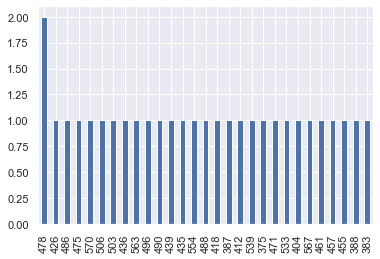

In [48]:
bs['BB'].value_counts().plot.bar()

all are unique values except 478

<AxesSubplot:>

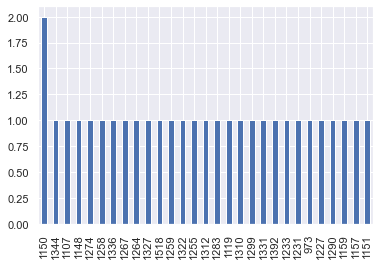

In [49]:
bs['SO'].value_counts().plot.bar()

all are unique values in the SO column except 1150 value

<AxesSubplot:>

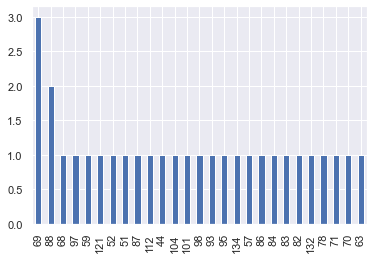

In [50]:
bs['SB'].value_counts().plot.bar()

mostly unique values in SB column

<AxesSubplot:>

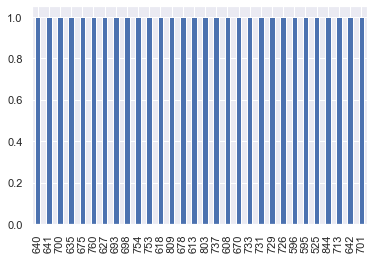

In [51]:
bs['RA'].value_counts().plot.bar()

all the unique values in this RA column

<AxesSubplot:>

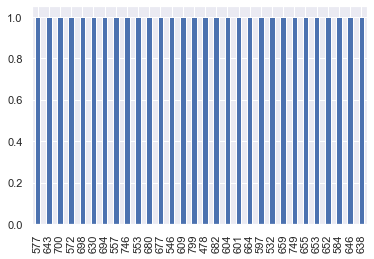

In [52]:
bs['ER'].value_counts().plot.bar()

all are unique values in this column

<AxesSubplot:>

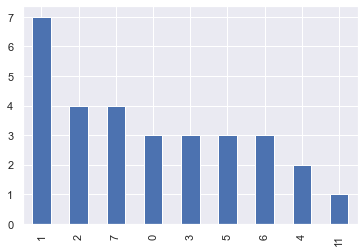

In [53]:
bs['CG'].value_counts().plot.bar()

in CG column mostly 1 player pitcher are high as compared to 11 pitchers  

<AxesSubplot:>

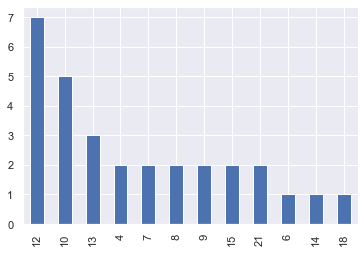

In [54]:
bs['SHO'].value_counts().plot.bar()

unique values are less means variuos value exists in SHO column

<AxesSubplot:>

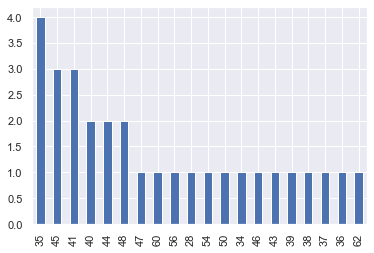

In [55]:
bs['SV'].value_counts().plot.bar()

SV column having mostly high unique values  

<AxesSubplot:>

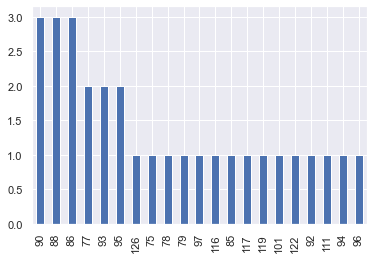

In [56]:
bs['E'].value_counts().plot.bar()

E column also having mostly unique values in the future column

<AxesSubplot:>

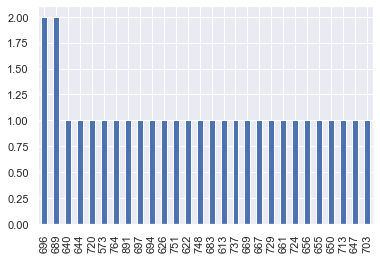

In [57]:
bs['R'].value_counts().plot.bar()

Column R also having mostly unique values

<AxesSubplot:>

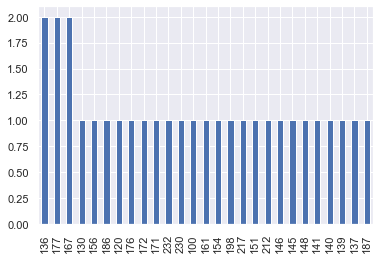

In [58]:
bs['HR'].value_counts().plot.bar()

HR column is mostly having unique values

<AxesSubplot:>

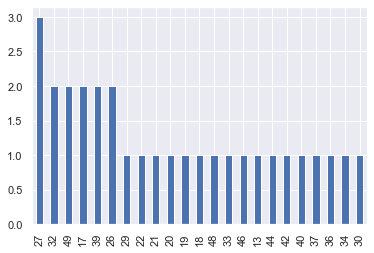

In [59]:
bs['3B'].value_counts().plot.bar()

3B column is also high unique values

<AxesSubplot:>

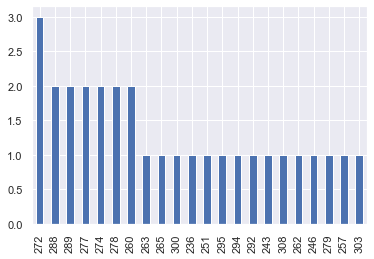

In [60]:
bs['2B'].value_counts().plot.bar()

2B column also mostly having unique values

<AxesSubplot:>

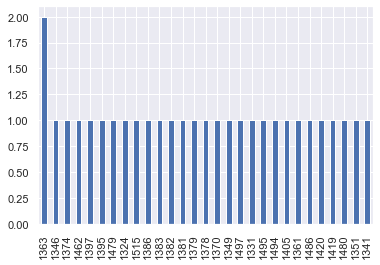

In [61]:
bs['H'].value_counts().plot.bar()

H column also all are unique values except 1363 which is repeating 2 times

<AxesSubplot:>

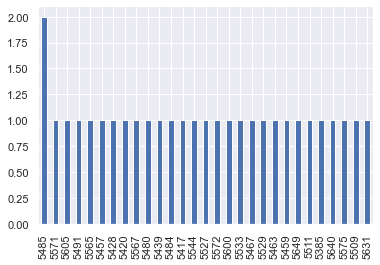

In [62]:
bs['AB'].value_counts().plot.bar()

all are unique values except 5485 entry which is repeating twice

<AxesSubplot:>

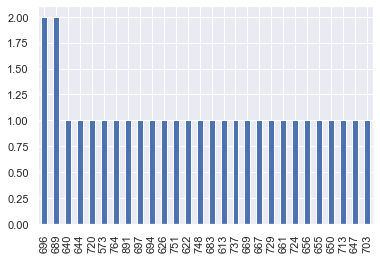

In [63]:
bs['R'].value_counts().plot.bar()

R values are mostly having unique entries

Univarient analysis Observations:
    from the above univarient analysis we can clearly observed that most of the entries in the all the columns are unique values

In [64]:
#Bivarient analysis
# lets see the relation between the dependent varibel with each of the independeent variables

In [65]:
bs.head(1)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='AB'>

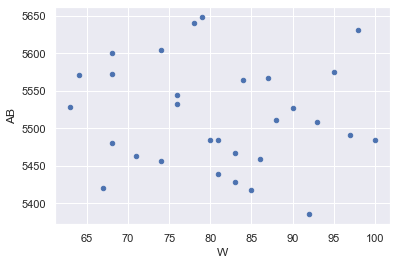

In [66]:
bs.plot.scatter('W','AB')

winning rate is not related to AB in positive or negitive way

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='ERA'>

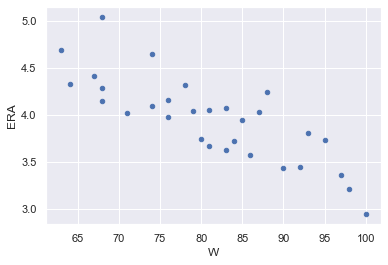

In [67]:
bs.plot.scatter('W','ERA')

winning rate is inversly proportion to ERA input column

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='CG'>

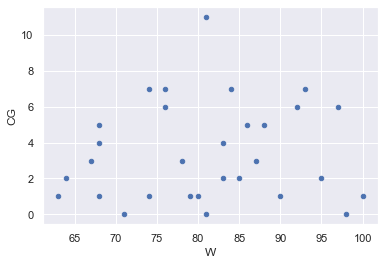

In [68]:
bs.plot.scatter('W','CG')

there is no much relation between winning rate column W of a team with CG input 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='SHO'>

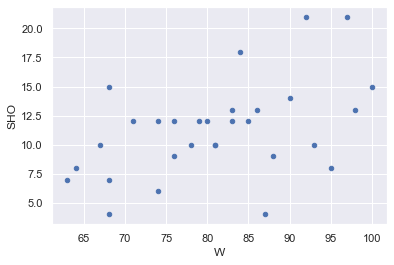

In [69]:
bs.plot.scatter('W','SHO')

with increasing SHO winning rating increases

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='SV'>

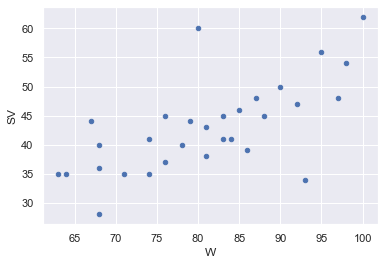

In [70]:
bs.plot.scatter('W','SV')

winning rate increases with increasing SV

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='E'>

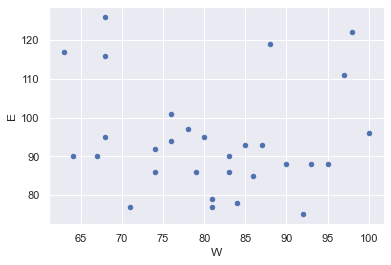

In [71]:
bs.plot.scatter('W','E')

winnings of a team slightly related with E column

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='2B'>

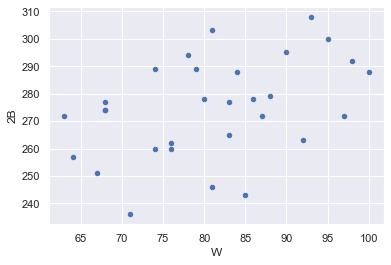

In [72]:
bs.plot.scatter('W','2B')

winning rate of teams slightly dependent on the 2B strike rate

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='3B'>

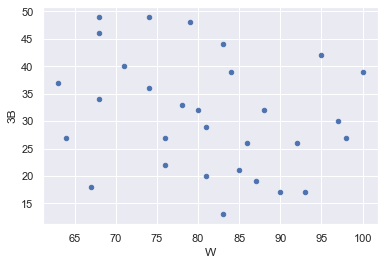

In [73]:
bs.plot.scatter('W','3B')

w is slightly dependent positively on 3B rate

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='HR'>

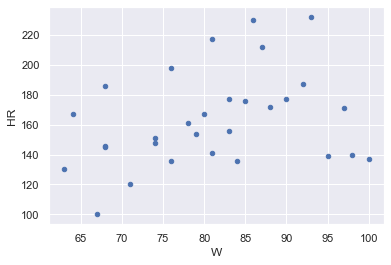

In [74]:
bs.plot.scatter('W','HR')

winning rate R is dependent positively on the home rate HR

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='BB'>

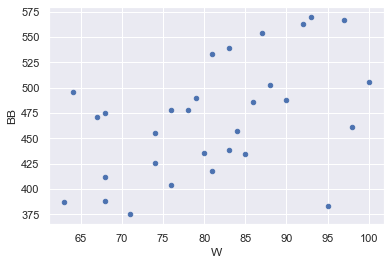

In [75]:
bs.plot.scatter('W','BB')

winning rate directly proportion to BB

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='SO'>

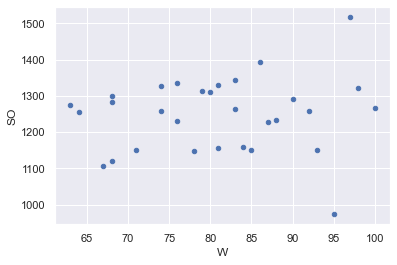

In [76]:
bs.plot.scatter('W','SO')

w is positively related to SO

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='SB'>

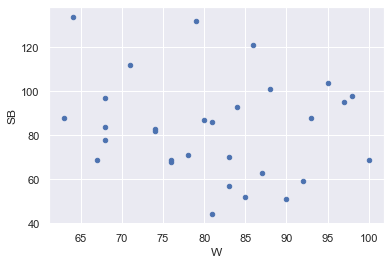

In [77]:
bs.plot.scatter('W','SB')

w is slightly positive relate with SB

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='RA'>

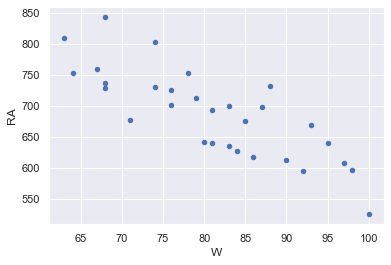

In [78]:
bs.plot.scatter('W','RA')

with high RA value W is high

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='ER'>

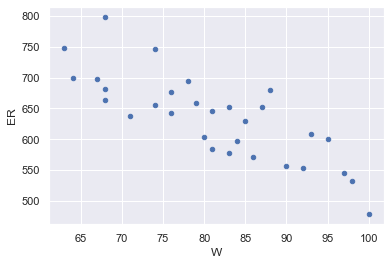

In [79]:
bs.plot.scatter('W','ER')

with high ER w rate is high

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='H'>

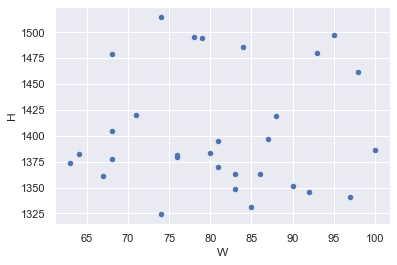

In [80]:
bs.plot.scatter('W','H')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='W', ylabel='R'>

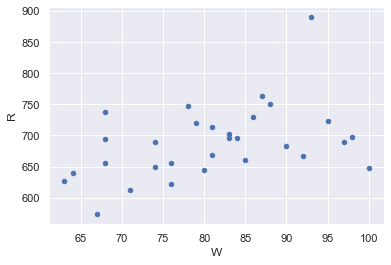

In [81]:
bs.plot.scatter('W','R')

hit rate R is positively related to winning rate W

In [82]:
# pair plot will show the relations with all the input and output variables
#importing the required visual libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
sns.set_theme(color_codes='g', context='notebook', style='darkgrid')

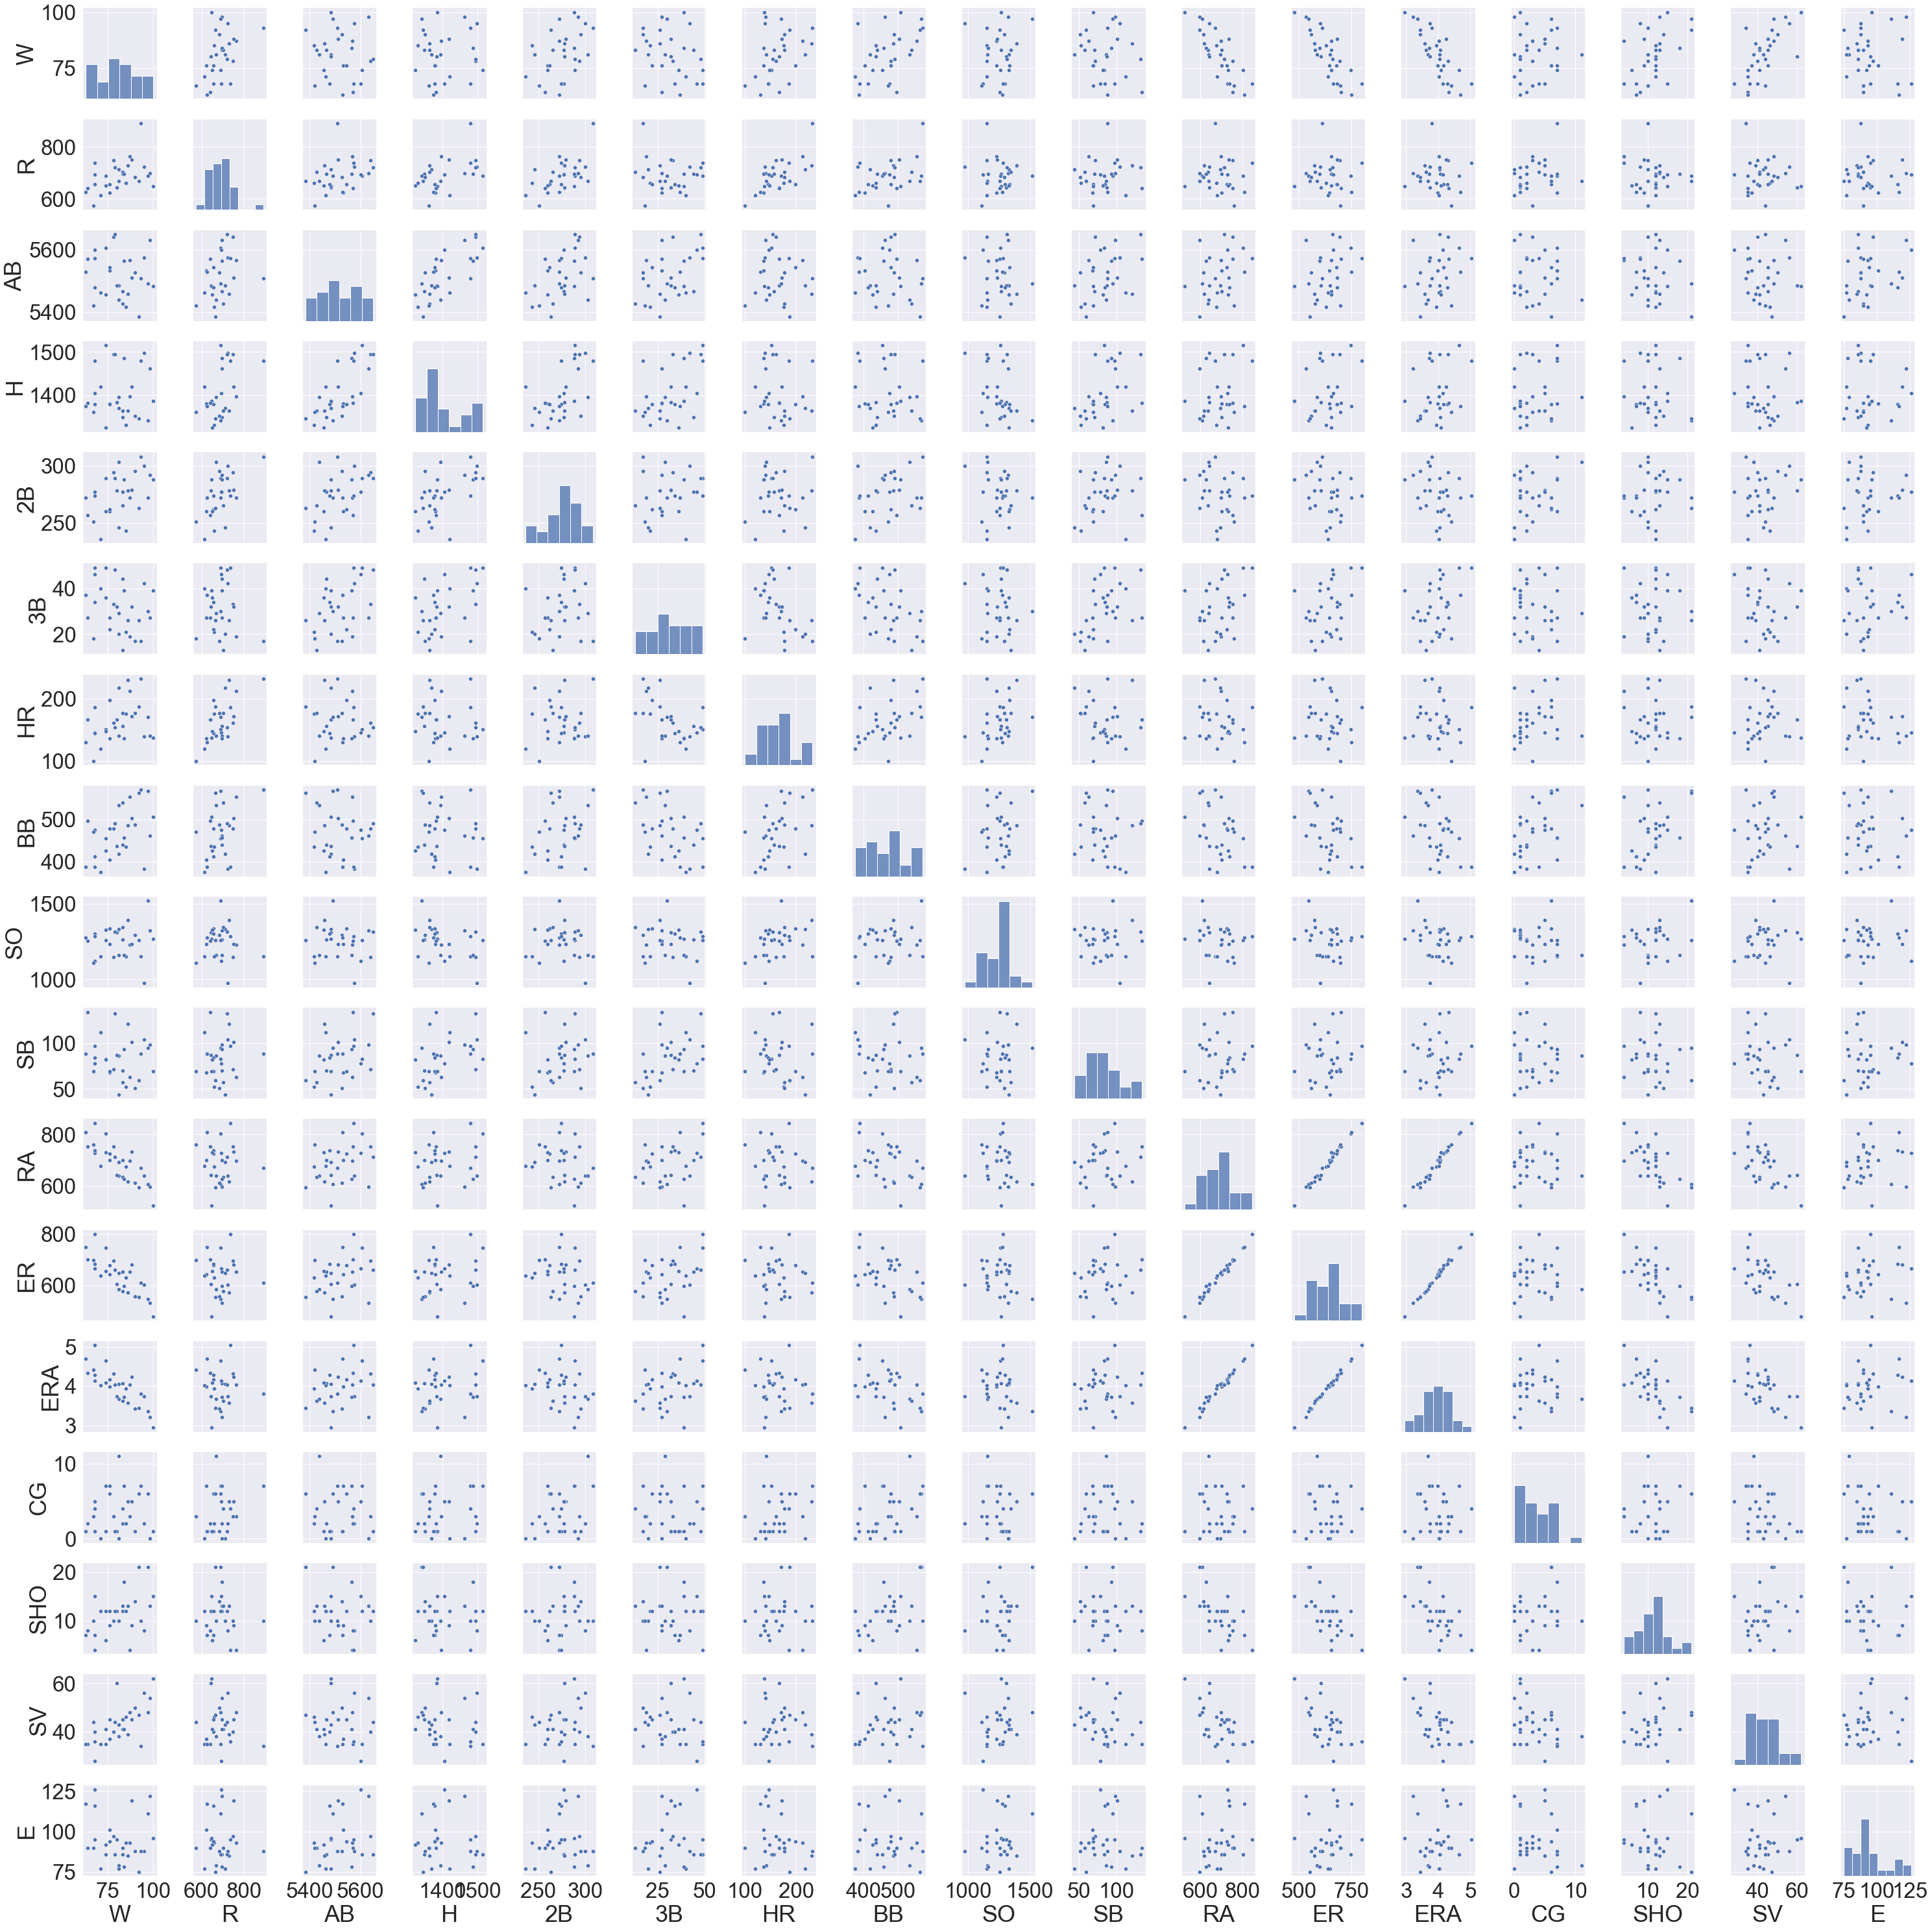

In [90]:
sns.set(font_scale=3)
sns.pairplot(bs)

with the above pair plots between the future columns and dependent we can clearly see that the all the data is slightly related oneon other

In [ ]:
# before proceeding further we will check the outliers in the data sets and the correleation between the data

W          AxesSubplot(0.125,0.71587;0.133621x0.16413)
R       AxesSubplot(0.285345,0.71587;0.133621x0.16413)
AB       AxesSubplot(0.44569,0.71587;0.133621x0.16413)
H       AxesSubplot(0.606034,0.71587;0.133621x0.16413)
2B      AxesSubplot(0.766379,0.71587;0.133621x0.16413)
3B        AxesSubplot(0.125,0.518913;0.133621x0.16413)
HR     AxesSubplot(0.285345,0.518913;0.133621x0.16413)
BB      AxesSubplot(0.44569,0.518913;0.133621x0.16413)
SO     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
SB     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
RA        AxesSubplot(0.125,0.321957;0.133621x0.16413)
ER     AxesSubplot(0.285345,0.321957;0.133621x0.16413)
ERA     AxesSubplot(0.44569,0.321957;0.133621x0.16413)
CG     AxesSubplot(0.606034,0.321957;0.133621x0.16413)
SHO    AxesSubplot(0.766379,0.321957;0.133621x0.16413)
SV           AxesSubplot(0.125,0.125;0.133621x0.16413)
E         AxesSubplot(0.285345,0.125;0.133621x0.16413)
dtype: object

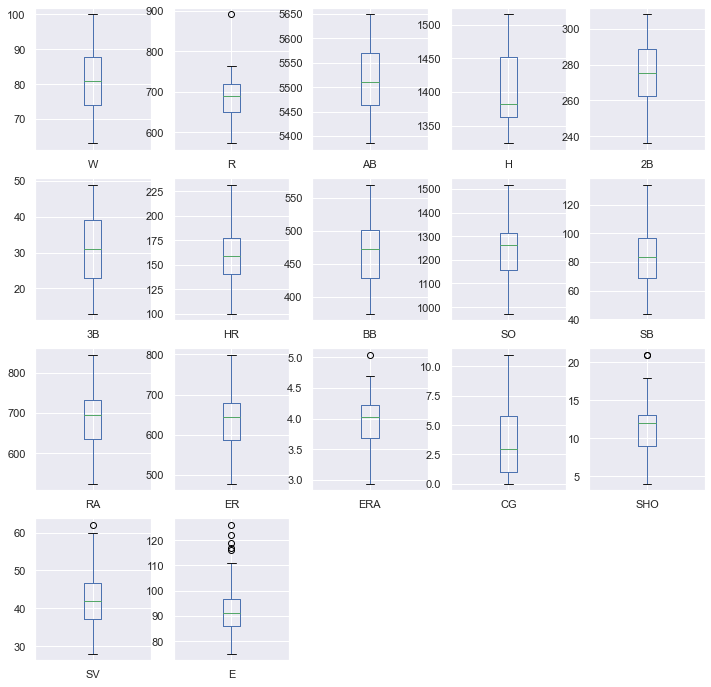

In [98]:
sns.set(font_scale=1)
bs.plot(kind='box', subplots=True, layout=(4,5), figsize=(12,12))

From the above box plots we can clearly see that the few outliers are present in the data sets
but we are not going to remove them because the data set is very small.
removing the data will left me with less data for my ML to train

<AxesSubplot:>

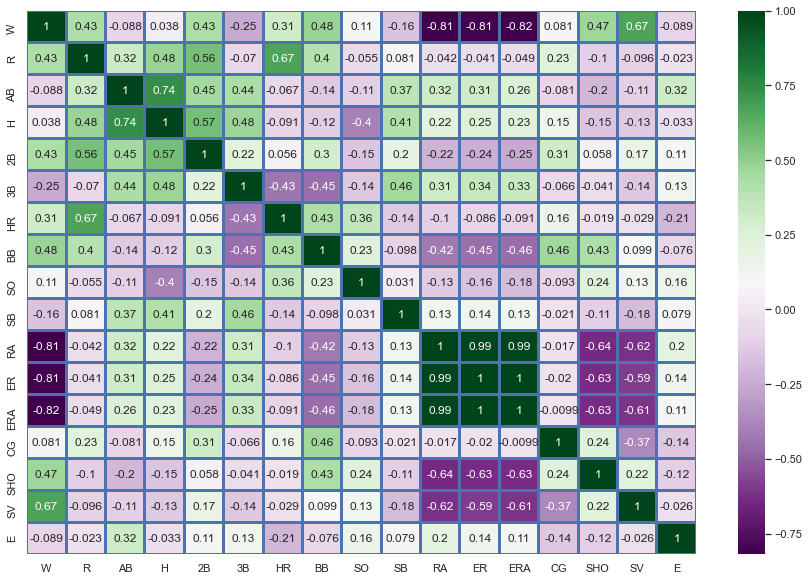

In [115]:
#lets check the correlation betweeen the variables
plt.figure(figsize=(15,10))
sns.heatmap(bs.corr(),annot=True, cmap='PRGn', linewidths=2,linecolor='b')

#### Observations:
    1.the winning w output was positively or negatively correclated with most of the future column except a few as below
    2.winning rate is very less dependent on future columns AB,H, CG,E
    3.the furture columns RA, ER,ERA are much correlated with each other that is not useful for my model to predict the correct W value

### variance_inflation_factor

Before proceeding further lets check the VIF of input variables

In [126]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [146]:
vf=pd.DataFrame()
vf['column_names']=bs.iloc[:,1:].columns
vf['VIF Values']=[variance_inflation_factor(bs.iloc[:,1:].values,n) for n in range(bs.iloc[:,1:].shape[1])]
vf.sort_values(by='VIF Values', ascending=False, inplace=True, ignore_index=True)
vf

,column_names,VIF Values
0,ER,49837.289228
1,ERA,23551.544014
2,RA,17204.829356
3,H,4698.798408
4,AB,4277.157018
5,R,1638.985029
6,2B,904.439835
7,SO,398.234104
8,HR,285.773237
9,BB,269.485018


array([<AxesSubplot:title={'center':'VIF Values'}, xlabel='column_names'>],
      dtype=object)

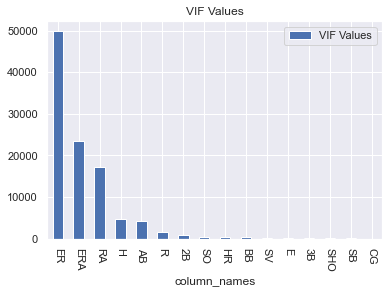

In [179]:
vf.plot.bar(x='column_names', y='VIF Values',stacked=True, subplots=True, rot=270)

as we mentioned earlier in the analysis of correlation heat map
the ERA, RA, ER are correlated each other highly, the same we can see here through the VIF analysis


### Feature Engineering

#### def:
the process of adding new columns or removing old columns to the existing data for the purpose of optimisingn the data set for useful data only 

### removing  column:
    1.from the boxplot we can see that the E column has many outliers and at the same time this future doesnot much correlated with my output column
    2.removing this column will more useful to training my model with good sample of data
    3.from vf visual we are going to drop ER,RA,AB columns along with E 
    4.the w correlation with H is very less so dropping that one also

In [233]:
#new data frame after dropping of columns
bs1=bs.drop(['RA','ER','AB','HR','H','E'],axis=1)

In [234]:
bs1.shape

(30, 11)

### Checking for skewness

In [ ]:
#data should be fall with in the normal distribution curv symmetrically
#if data is not like that we have to reduce the skewness by using various methods like 'boxcox',log transformation etc.,

In [ ]:
#let check the skewness with distribution plot

In [235]:
bs1.head(2)

,W,R,2B,3B,BB,SO,SB,ERA,CG,SHO,SV
0,95,724,300,42,383,973,104,3.73,2,8,56
1,83,696,277,44,439,1264,70,4.07,2,12,45


C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R', ylabel='Density'>

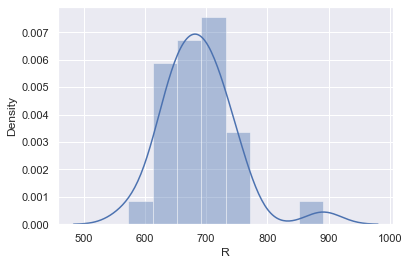

In [237]:
sns.distplot(bs1['R'])

Observations:
    Very less skewness at right side i.e +ve skewed

C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2B', ylabel='Density'>

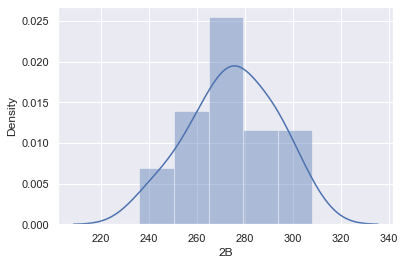

In [239]:
sns.distplot(bs1['2B'])

Observations:
    Very less skewness

C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='3B', ylabel='Density'>

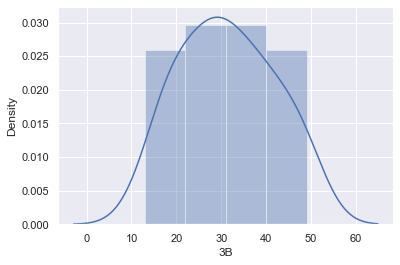

In [241]:
sns.distplot(bs1['3B'])

Observations:
    Very less skewness

C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BB', ylabel='Density'>

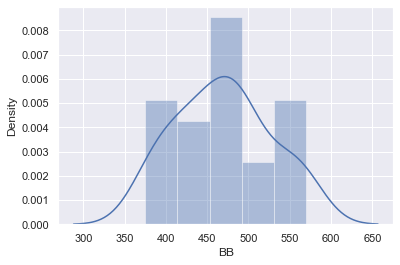

In [242]:
sns.distplot(bs1['BB'])

Observations:
    Very less skewness

C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SV', ylabel='Density'>

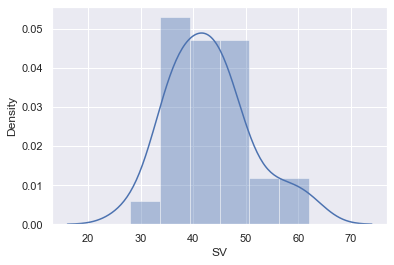

In [243]:
sns.distplot(bs1['SV'])

Observations:
    Very less skewness present

C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SO', ylabel='Density'>

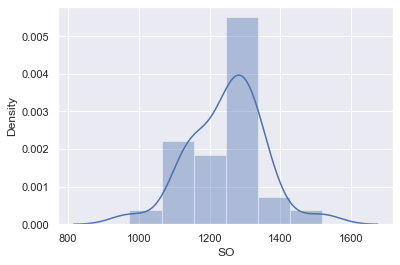

In [244]:
sns.distplot(bs1['SO'])

Observations:
    Very less skewness present

C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SB', ylabel='Density'>

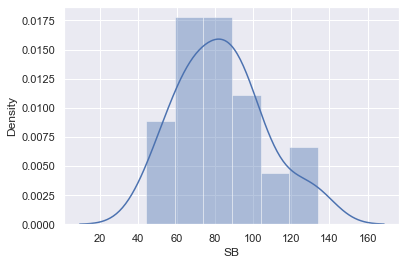

In [245]:
sns.distplot(bs1['SB'])

Observations:
    Very less skewness present

C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ERA', ylabel='Density'>

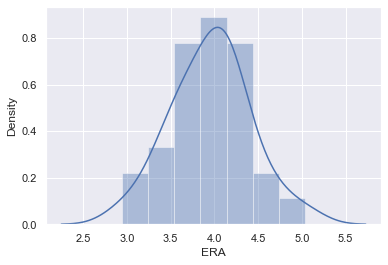

In [246]:
sns.distplot(bs1['ERA'])

Observations:
    almost no skewness in this data

C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CG', ylabel='Density'>

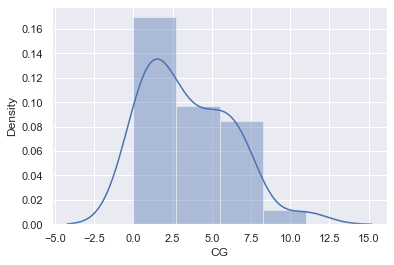

In [247]:
sns.distplot(bs1['CG'])

Observations:
    Right skewed

C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SHO', ylabel='Density'>

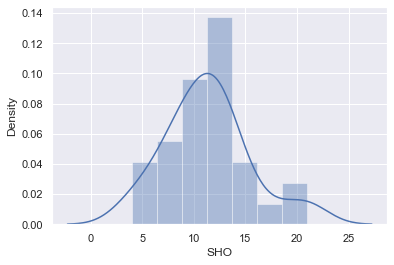

In [249]:
sns.distplot(bs1['SHO'])

Observations:
    Very less skewness at right side i.e +ve skewed

# DATA Preprocessing

### Removing the skewness

In [ ]:
'''from the above dist plots we can see that all the data in future column are normally disturbuted except the data in
column CG'''

In [ ]:
'''by using the available methods we are going to reduce the skewness in this future'''

In [258]:
#importing the power transform method from scipy stats library
from sklearn.preprocessing import power_transform
import numpy as np

In [267]:
cg=np.array(bs1['CG'])

In [269]:
bs1['CG']=power_transform(cg.reshape(-1,1),method='yeo-johnson')

C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CG', ylabel='Density'>

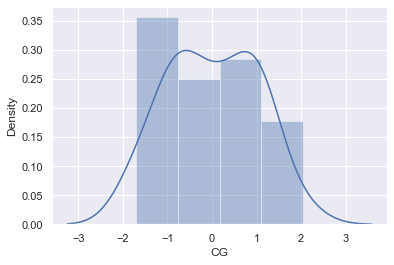

In [271]:
sns.distplot(bs1['CG'])

Observations:
    after power transformation the skewness was reduced in CG column

### scaling

In [ ]:
'''after the data is free from skewness its time to scale the data so that all the values in the each field are with 
magnitudeonly'''

In [273]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
#minamx scaler reduce the value of data in between 0 and 1

In [280]:
scale=MinMaxScaler()

In [281]:
scale.fit(bs1.iloc[:,1:])

MinMaxScaler()

In [282]:
scale.transform(bs1.iloc[:,1:])

array([[0.47484277, 0.88888889, 0.80555556, 0.04102564, 0.        ,
        0.66666667, 0.37619048, 0.35407596, 0.23529412, 0.82352941],
       [0.38679245, 0.56944444, 0.86111111, 0.32820513, 0.53394495,
        0.28888889, 0.53809524, 0.35407596, 0.47058824, 0.5       ],
       [0.30188679, 0.93055556, 0.44444444, 0.81025641, 0.33761468,
        0.46666667, 0.34761905, 1.        , 0.35294118, 0.29411765],
       [0.15408805, 0.33333333, 0.38888889, 0.14871795, 0.4733945 ,
        0.26666667, 0.4952381 , 0.78320534, 0.29411765, 0.26470588],
       [0.36477987, 0.73611111, 1.        , 0.41025641, 0.52477064,
        0.43333333, 0.80952381, 0.78320534, 0.47058824, 0.20588235],
       [1.        , 1.        , 0.11111111, 1.        , 0.3266055 ,
        0.48888889, 0.40952381, 0.78320534, 0.35294118, 0.17647059],
       [0.60062893, 0.5       , 0.16666667, 0.91794872, 0.46605505,
        0.21111111, 0.51904762, 0.46686198, 0.        , 0.58823529],
       [0.44025157, 0.13888889, 0.1944444

### Spliting the Data and Model selection

In [285]:
#assigning the future columns into x
x=bs1.iloc[:,1:]

In [286]:
#assigning the output column into y
y=bs1.iloc[:,0]

In [288]:
x.shape, y.shape

((30, 10), (30,))

In [289]:
#importing the required libraries for Logstics regression
import sklearn
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

### Hyper parameter tuning

Hyper parameter tuning is nothing but the finding the correct parameters of a model so the model can perform at it highest performance state

In [291]:
from sklearn.model_selection import GridSearchCV

In [375]:
rf, ab,dt,lr=RandomForestRegressor(), AdaBoostRegressor(), DecisionTreeRegressor(), LinearRegression(fit_intercept=True,normalize=True)
#creating perameters
model_par={'DecisionTreeRegressor':{'model':dt,'param':{'criterion' : ["mse", "friedman_mse", "mae", "poisson"],'splitter':['best','random']}},
           'RandomForestRegressor':{'model':rf,'param':{'n_estimators':[100,120,150],'criterion':['mse', 'mae'],'max_features':['auto','sqrt','log2']}},
           'AdaBoostRegressor':{'model':ab,'param':{'loss':['linear', 'square', 'exponential']}},
           'LinearRegression':{'model':lr,'param':{'fit_intercept':[True],'normalize':[True]}}
          }
scores=[]
for model_name, mp in model_par.items():
    model_selection=GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(x,y)
    scores.append({'model':model_name,'best_score':model_selection.best_score_,'best_params':model_selection.best_params_})
scores

[{'model': 'DecisionTreeRegressor',
  'best_score': -0.8629653256548476,
  'best_params': {'criterion': 'poisson', 'splitter': 'best'}},
 {'model': 'RandomForestRegressor',
  'best_score': 0.04880530232627922,
  'best_params': {'criterion': 'mse',
   'max_features': 'log2',
   'n_estimators': 120}},
 {'model': 'AdaBoostRegressor',
  'best_score': -0.13472223686630386,
  'best_params': {'loss': 'exponential'}},
 {'model': 'LinearRegression',
  'best_score': 0.5110272328137853,
  'best_params': {'fit_intercept': True, 'normalize': True}}]

### So Linear Regressor is the best model for this model build up

In [379]:
lr.fit(x,y)
lr.coef_,lr.intercept_,lr.score(x,y)


(array([ 9.13038708e-02, -6.68529667e-02,  5.86667622e-02, -1.54719976e-02,
        -6.65100539e-04, -2.06909346e-02, -1.32144916e+01,  1.79019827e+00,
         1.71576139e-01,  5.89599909e-01]),
 69.42457399815758,
 0.9309751835740625)

In [380]:
pre=lr.predict(x)
com=pd.DataFrame(y)
com['pre']=pre
com

,W,pre
0,95,93.640556
1,83,82.090293
2,81,80.433452
3,76,74.909213
4,74,69.874410
5,93,93.526767
6,87,87.236746
7,81,81.496123
8,80,88.479984
9,78,78.801941


In [383]:
I=[]
score=[]
ma=[]
ms=[]
r2=[]
cv=[]

for i in range(1,1000):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1,random_state=i)
        lr.fit(xtrain,ytrain)
        tr=lr.score(xtrain,ytrain)
        te=lr.score(xtest,ytest)
        pre=lr.predict(xtest)
        mar=mean_absolute_error(ytest,pre)
        mse=np.sqrt(mean_squared_error(ytest,pre))
        CV=cross_val_score(lr,x,y,cv=4).mean()*100
        r=r2_score(ytest,pre)
        I.append(i)
        score.append(te)
        ma.append(mar)
        ms.append(mse)
        r2.append(r)
        cv.append(CV)
values=pd.DataFrame({'accuracy':score,'r2_score':r2,'r_state':I,'error':ms,'CV_score':cv})
values.sort_values(by='accuracy', ascending=False, inplace=True,ignore_index=True)
print('at random state',round(values.loc[0][2],0),'the model having the highest accuracy of',round(values.loc[0][0]*100,2))
print('Mean Square Error Value',values.loc[0][3],'CV_Score',values.loc[0][4])

at random state 867.0 the model having the highest accuracy of 99.78
Mean Square Error Value 0.6165689553836626 CV_Score 74.4216587194663


In [384]:
#model saving
import pickle
filename='baseball_casestudy.pkl'
pickle.dump(lr,open(filename,'wb'))